# 8장: 수치시뮬레이션으로 소비자의 행동을 예측하는 테크닉 10

In [1]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

## 71 : 인간관계 네트워크 가시화

In [2]:
import pandas as pd

df_links = pd.read_csv("links.csv")
df_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Node9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


20명의 연결을 라이브러리 networkx를 이용해 가시화

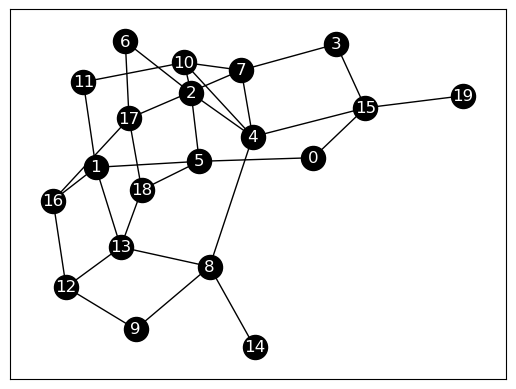

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# 그래프 객체 생성
G = nx.Graph()

# 노드 설정
NUM = len(df_links.index)
for i in range(1,NUM+1):
    node_no = df_links.columns[i].strip("Node")
    G.add_node(str(node_no))

# 엣지 설정
for i in range(NUM):
    for j in range(NUM):
        node_name = "Node" + str(j)
        if df_links[node_name].iloc[i]==1:
            G.add_edge(str(i),str(j))
        
# 그리기
nx.draw_networkx(G,node_color="k", edge_color="k", font_color="w")
plt.show()

- draw가 아닌 draw_networkx를 사용
    - 다른 것과 연결이 많은 노드를 중심에 오게 자동으로 위치를 결정해서 가시화

## 72 : 입소문에 의한 정보전파 모습 가시화

입소문이 전파되는 모습을 시뮬리이션
- '10개의 연결 중 하나의 확률로 (10%) 소문이 전파된다'라는 가정 하에 입소문의 모습을 시뮬레이션

In [4]:
import numpy as np

In [5]:
def determine_link(percent): #인수로 입소문을 낼 확률 전달
    rand_val = np.random.rand()
    if rand_val<=percent:
        return 1
    else:
        return 0

In [6]:
def simulate_percolation(num, list_active, percent_percolation): #입소문을 시뮬레이션
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                node_name = "Node" + str(j)
                if df_links[node_name].iloc[i]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    return list_active

- num: 사람수
- list_active: 각각의 노트(사람)에 입소문이 전달 됐는지)
- percent_percolation: 입소문을 일으킬 확률

In [7]:
percent_percolation = 0.1
T_NUM = 36
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())

In [8]:
# 액티브 노드 가시화 #
def active_node_coloring(list_active):
    #print(list_timeSeries[t])
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i]==1:
            list_color.append("r")
        else:
            list_color.append("k")
    #print(len(list_color))
    return list_color

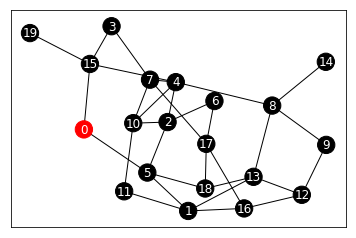

In [9]:
# 그리기
t = 0
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

- 빨간 노드는 하나뿐  (빨간 노드: 입소문이 전파된 노드)

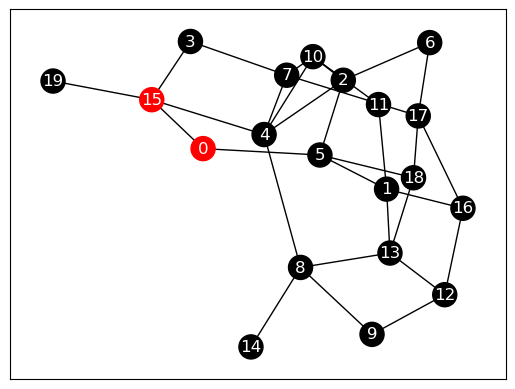

In [10]:
# 그리기
t = 11
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

- 빨간 노드 증가

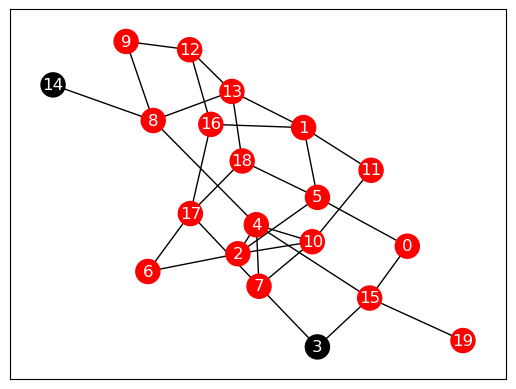

In [11]:
# 그리기
t = 35
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

- 거의 빨간 노드가 됨

## 73 : 입소문 수의 시계열 변화 그래프화

입소문의 수를 시계열로 표시하기

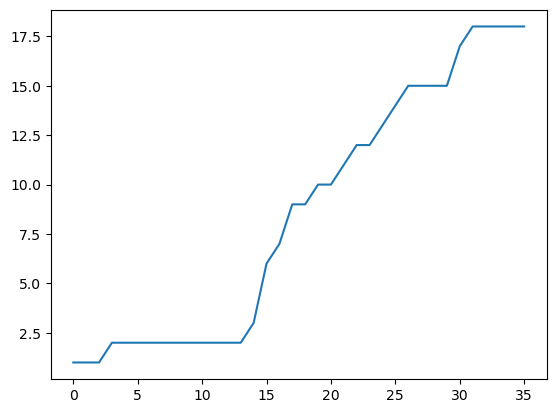

In [12]:
# 시계열 그래프 그리기
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

## 74 : 회원수의 시계열변화 시뮬레이션

In [13]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence,df_links):
    # 확산 #
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                if df_links.iloc[i][j]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    # 소멸 #
    for i in range(num):
        if determine_link(percent_disapparence)==1:
            list_active[i] = 0
    return list_active

In [14]:
percent_percolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

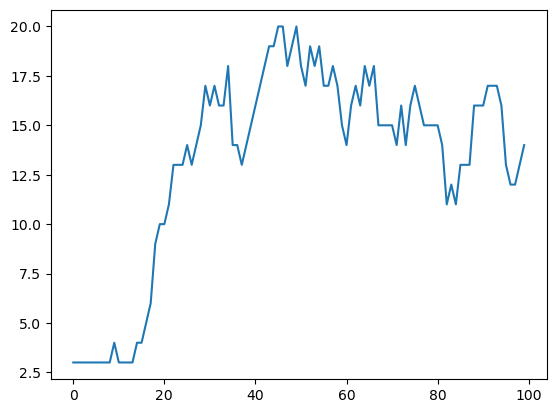

In [15]:
# 시계열 그래프 그리기
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

- 입소문 전파에다가 새롭게 '소멸'이라는 조작 추가
- 입소문에 의한 회원 증가와 감소의 모습 시뮬레이션

In [16]:
percent_disapparence = 0.2 #소멸의 확률을 늘렸을 때
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

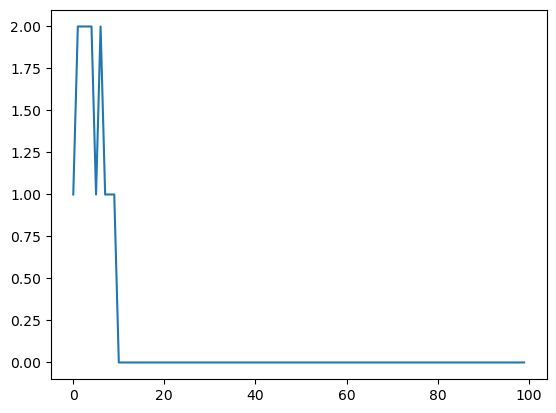

In [17]:
# 시계열 그래프 그리기
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

## 75 : 파라메터 전체를 '상관관계'를 보면서 파악

In [18]:
# 상관관계 계산
print("상관관계 계산시작")
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram,NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram):
    for i_d in range(NUM_PhaseDiagram):
        percent_percolation = 0.05*i_p
        percent_disapparence = 0.05*i_d
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
        phaseDiagram[i_p][i_d] = sum(list_active)
print(phaseDiagram)

상관관계 계산시작
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [19. 12.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 12. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 11. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 17. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 14.  0. 13.  1.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 16. 15. 15.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 16. 19. 14. 11. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 18. 15. 16. 15. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 14. 15. 14. 13. 13. 15.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 18. 16. 11. 15. 15. 11.  0.  0.  0.  0.  0.  

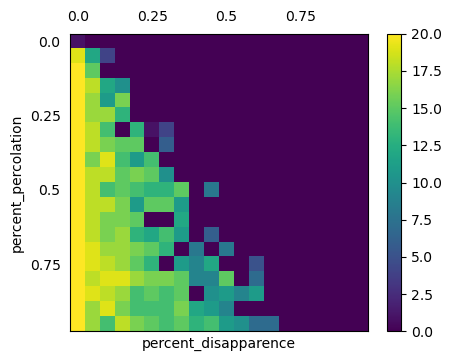

In [19]:
# 표시
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
plt.show()

## 76 : 실제 데이터 불러오기

In [23]:
import pandas as pd

df_mem_links = pd.read_csv("links_members.csv")
df_mem_info = pd.read_csv("info_members.csv")
df_mem_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Node535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
536,Node536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
537,Node537,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
538,Node538,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 77 : 링크 수의 분포 가시화

In [24]:
NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
    array_linkNum[i] = sum(df_mem_links["Node"+str(i)])

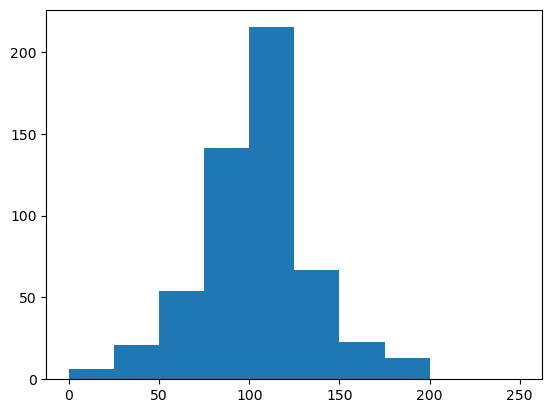

In [25]:
plt.hist(array_linkNum, bins=10,range=(0,250)) #히스토그램
plt.show()

## 78 : 시뮬레이션을 위해 실제 데이터로부터 파라메터 추정

In [26]:
NUM = len(df_mem_info.index) # 노드의 수
T_NUM = len(df_mem_info.columns)-1 #시간 단계의 수
# 소멸 확률 추정 #
#각 시간 단계(t)에서 멤버의 상태 확인
count_active = 0 #시간 t+1에서 비활성 상태(0)로 변한 노드의 개수 저장
count_active_to_inactive = 0 #현재 시간에 활성 상태(1)인 노드의 개수 저장
for t in range(1,T_NUM):
    for i in range(NUM):
        if (df_mem_info.iloc[i][t]==1):
            count_active_to_inactive += 1
            if (df_mem_info.iloc[i][t+1]==0):
                count_active += 1
estimated_percent_disapparence = count_active/count_active_to_inactive

In [27]:
# 확산 확률 추정 #
count_link = 0 #시간 t에 비활성 상태였지만, 활성 노드와 연결된 비활성 노드의 수
count_link_to_active = 0 #시간 t+1에 활성화된 비활성 노드의 수
count_link_temp = 0
for t in range(T_NUM-1):
    df_link_t = df_mem_info[df_mem_info[str(t)]==1] #시간 t에 활성 상태엔 노드들만을 선택한 df
    temp_flag_count = np.zeros(NUM) #노드별로 중복 카운팅을 방지하기 위한 플래그 배열
    for i in range(len(df_link_t.index)):
        df_link_temp = df_mem_links[df_mem_links["Node"+str(df_link_t.index[i])]==1] #현재 활성화된 노드와 연결된 노드들 찾음
        for j in range(len(df_link_temp.index)):
            if (df_mem_info.iloc[df_link_temp.index[j]][t]==0):
                if (temp_flag_count[df_link_temp.index[j]]==0):
                    count_link += 1
                if (df_mem_info.iloc[df_link_temp.index[j]][t+1]==1):
                    if (temp_flag_count[df_link_temp.index[j]]==0):
                        temp_flag_count[df_link_temp.index[j]] = 1 
                        count_link_to_active += 1
estimated_percent_percolation = count_link_to_active/count_link

- df[df["column"] == value]: 조건을 만족하는 행을 선택하는 방법
- np.zeros(NUM): 주어진 크기만큼의 0으로 초기화된 배열을 생성

In [28]:
estimated_percent_disapparence

0.10147163541419416

In [29]:
estimated_percent_percolation

0.025184661323275185

## 테크닉 79 : 실제데이터와 시뮬레이션 비교

In [30]:
percent_percolation = 0.025184661323275185 # 확산 확률
percent_disapparence = 0.10147163541419416 # 소멸 확률
T_NUM = 24 # 시간 단계 수
NUM = len(df_mem_links.index) # 총 노드의 수
list_active = np.zeros(NUM) # 시뮬레이션에서 현재 상태를 나타내는 배열
list_active[0] = 1 # 초기에는 첫째 노드만 활성화(1)
list_timeSeries = [] # 각 시간 단계에서 활성 상태의 변화를 저장할 리스트
for t in range(T_NUM): # 시뮬레이션을 통한 활성 상태 변화 계산
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

시뮬레이션 결과 계산

In [31]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

실제 데이터에서 활성 노드 수 계산

In [32]:
T_NUM = len(df_mem_info.columns)-1
list_timeSeries_num_real = []
for t in range(0,T_NUM):
    list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)]==1].index))

시각화

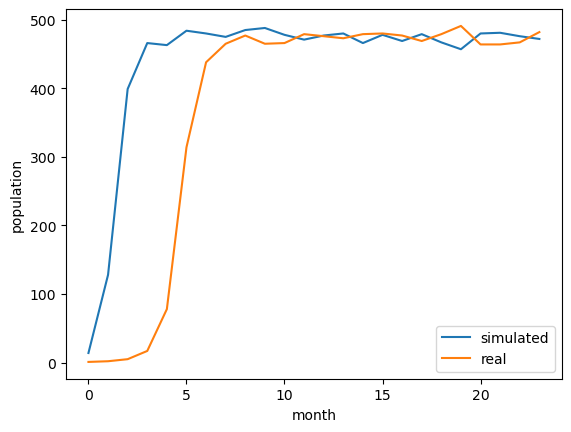

In [33]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.plot(list_timeSeries_num_real, label = 'real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()

## 80 : 시뮬레이션으로 미래 예측

In [34]:
percent_percolation = 0.025184661323275185 #확산 확률
percent_disapparence = 0.10147163541419416 #소멸 확률
T_NUM = 36 #시간 단계 수
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

In [35]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

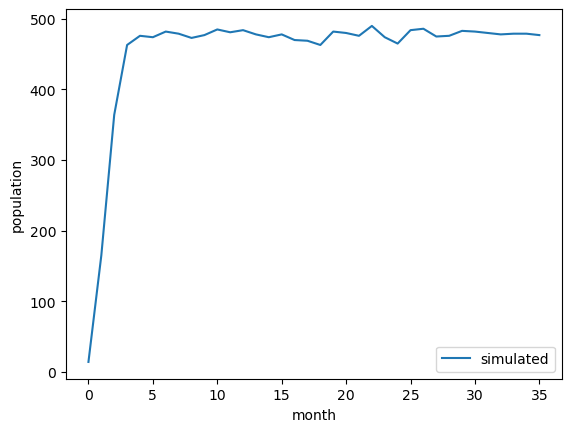

In [36]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()